In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

FIGSIZE = (20, 6)

In [2]:
from src.read_input import read_dataset, format_dataset, group_datasets_by_location


years = [i.name for i in os.scandir(f"inmet-data") if i.is_dir()]
location = "A101"


raw_data = group_datasets_by_location(location, years)
raw_data

,index,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,0,2000-05-09,00:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
1,1,2000-05-09,01:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
2,2,2000-05-09,02:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
3,3,2000-05-09,03:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
4,4,2000-05-09,04:00,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212395,5107,2024/07/31,1900 UTC,0,"1004,9","1005,7","1004,9","482,7","34,8","19,1",...,"34,4","20,2","18,2",43.0,38.0,40.0,145.0,"6,2","2,4",NaN
212396,5108,2024/07/31,2000 UTC,0,"1004,5","1004,9","1004,5","609,6","34,4","20,1",...,"33,9","20,4","18,9",44.0,40.0,43.0,65.0,"5,8","2,8",NaN
212397,5109,2024/07/31,2100 UTC,0,"1004,8","1004,8","1004,5","162,6","33,1","20,8",...,"33,1","20,8","19,3",48.0,42.0,48.0,71.0,"6,2","2,2",NaN
212398,5110,2024/07/31,2200 UTC,0,"1005,1","1005,2","1004,7","49,4","32,5","20,4",...,"32,4","21,1","20,2",50.0,48.0,49.0,77.0,"4,5","1,8",NaN


In [3]:
renamed_data = format_dataset(raw_data)
renamed_data

,global-radiation,total-precipitation,relative-humidity,temperature-last-hour-max,temperature-last-hour-min,wind-speed,wind-speed-max-gust
datetime,,,,,,,
2000-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-07-31 19:00:00,482.7,0.0,40.0,35.5,34.4,2.4,6.2
2024-07-31 20:00:00,609.6,0.0,43.0,35.4,33.9,2.8,5.8
2024-07-31 21:00:00,162.6,0.0,48.0,34.5,33.1,2.2,6.2


In [4]:
from src.dataframe_manipulation import (
    group_df_by_day,
    DEAFULT_INDEX_COLUMN,
    DEAFULT_TARGET_COLUMN,
)

target = DEAFULT_TARGET_COLUMN
idx = DEAFULT_INDEX_COLUMN

by_day = group_df_by_day(renamed_data, idx, target)
by_day

,global-radiation,total-precipitation,relative-humidity,temperature-last-hour-max,temperature-last-hour-min,wind-speed,wind-speed-max-gust
datetime,,,,,,,
2000-05-09,285.000000,0.000000,81.333333,28.866667,27.266667,0.333333,2.100000
2000-05-10,1597.666667,0.000000,84.291667,27.416667,26.316667,0.700000,2.329167
2000-05-11,1705.583333,0.066667,83.541667,27.270833,26.420833,0.908333,5.279167
2000-05-12,475.500000,0.175000,90.250000,25.850000,25.158333,1.245833,3.608333
2000-05-13,1193.416667,0.075000,88.791667,26.295833,25.200000,1.112500,6.504167
...,...,...,...,...,...,...,...
2024-07-27,619.220833,0.000000,59.875000,31.066667,30.100000,1.816667,4.287500
2024-07-28,615.779167,0.000000,60.250000,31.283333,30.370833,2.050000,4.945833
2024-07-29,644.637500,0.000000,59.291667,31.487500,30.562500,2.170833,5.312500


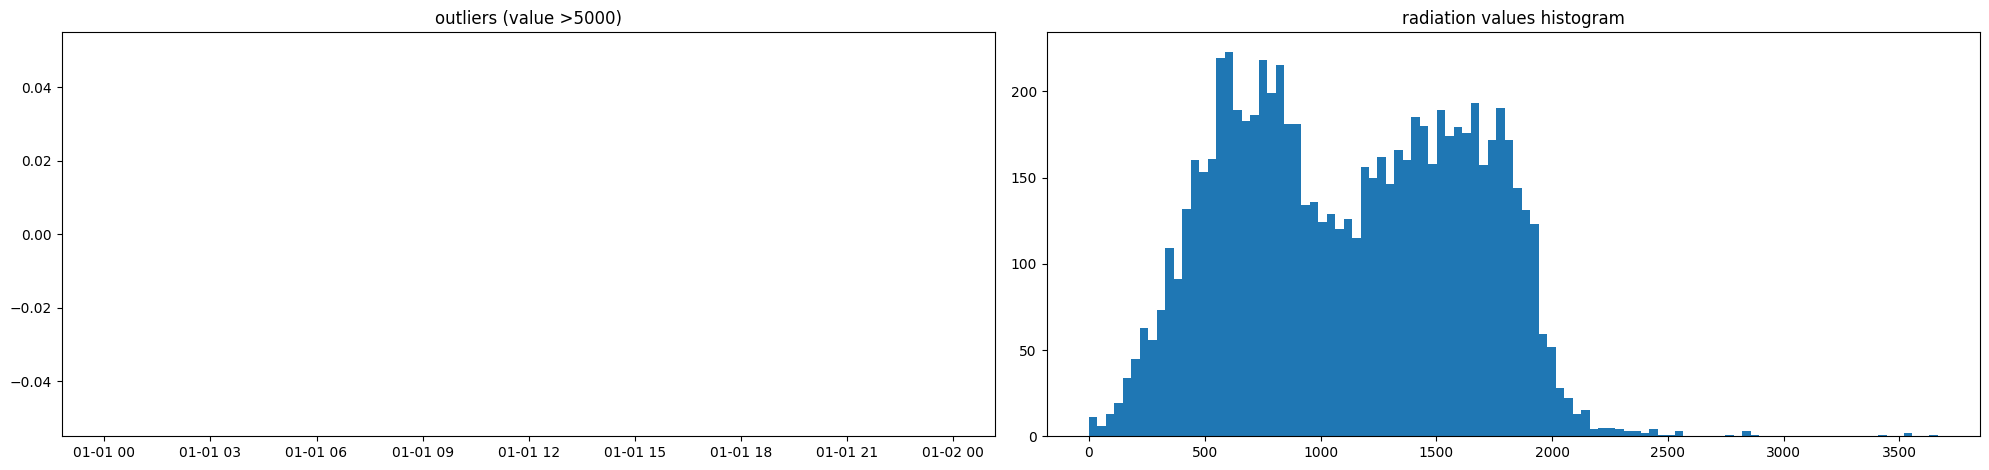

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(20)
cap = 5000

ax[0].set_title(f"outliers (value >{cap})")
ax[0].plot(by_day.loc[by_day[target] > cap, target], ".")

ax[1].set_title("radiation values histogram")
ax[1].hist(by_day[target], 100)

plt.tight_layout()

by_day = by_day.loc[by_day[target] < cap]

'len(train) = 7168 | len(test) = 365'

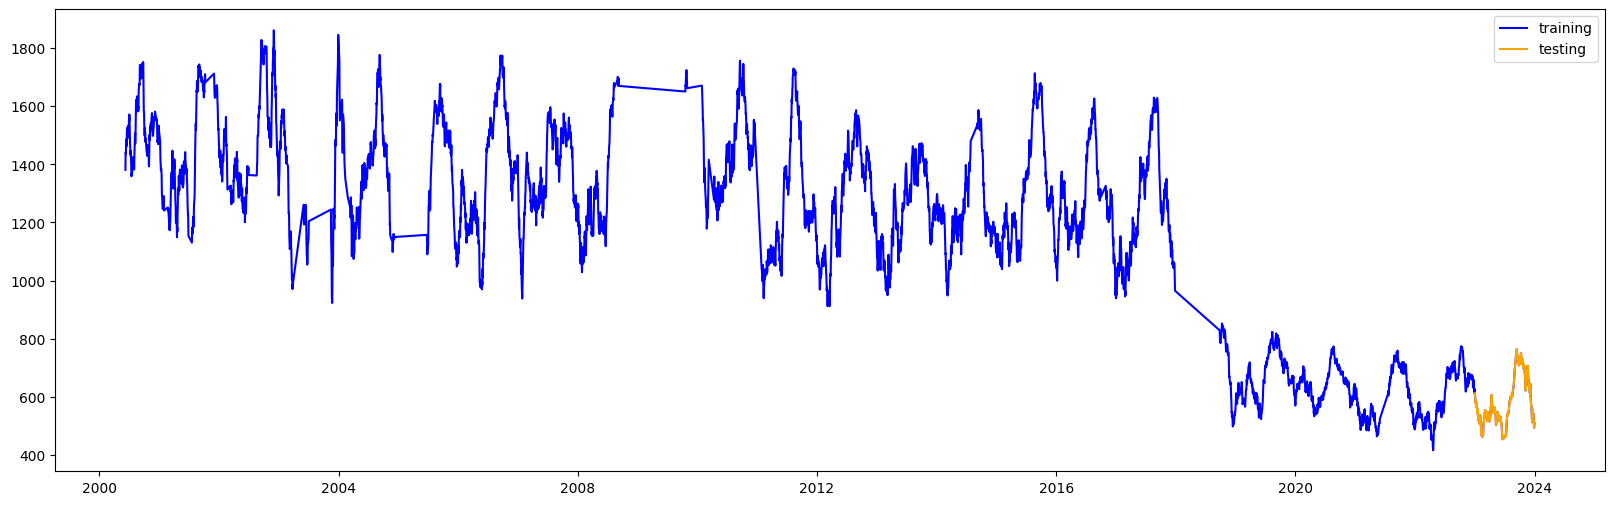

In [6]:
from src.train_test_data import training_threshold, testing_treshold
from src.rolling_means import make_rolling_window

date_threshold = pd.to_datetime("2023-01-01", format="%Y-%m-%d")
date_upper_threshold = date_threshold + pd.DateOffset(years=1)


def training_threshold(col, date_threshold: pd.DatetimeIndex):
    return col <= date_threshold


def testing_treshold(
    col, date_lower_threshold: pd.DatetimeIndex, date_upper_threshold: pd.DatetimeIndex
):
    return ~training_threshold(col, date_lower_threshold) & (
        col <= date_upper_threshold
    )


def split_datasets(
    df: pd.DataFrame,
    date_lower_threshold: pd.DatetimeIndex,
    date_upper_threshold: pd.DatetimeIndex,
):
    return (
        df[training_threshold(df.index, date_upper_threshold)].dropna(),
        df[
            testing_treshold(df.index, date_lower_threshold, date_upper_threshold)
        ].dropna(),
    )


train, test = split_datasets(by_day, date_threshold, date_upper_threshold)

by_day_rolling = make_rolling_window(by_day)
train_rolling, test_rolling = split_datasets(
    by_day_rolling, date_threshold, date_upper_threshold
)

plt.figure(figsize=FIGSIZE)
plt.plot(train_rolling[target], color="blue", label="training")
plt.plot(test_rolling[target], color="orange", label="testing")
plt.legend()

f"len(train) = {train[target].size} | len(test) = {test[target].size}"

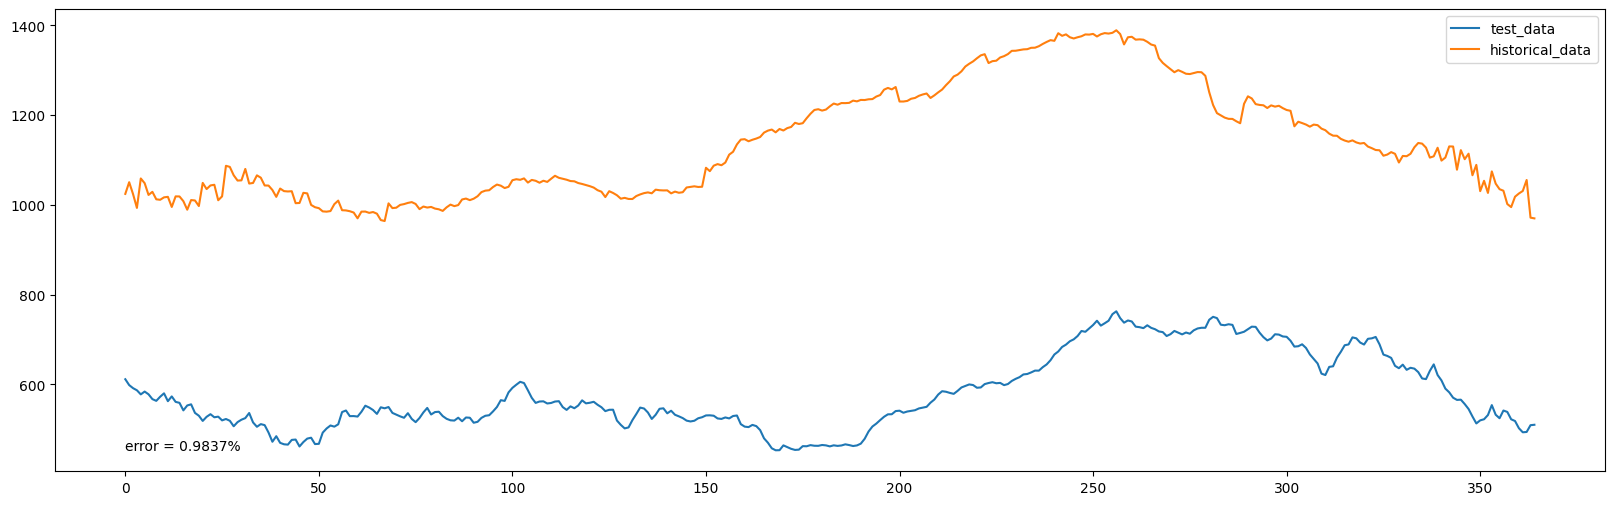

'error = 0.9837%'

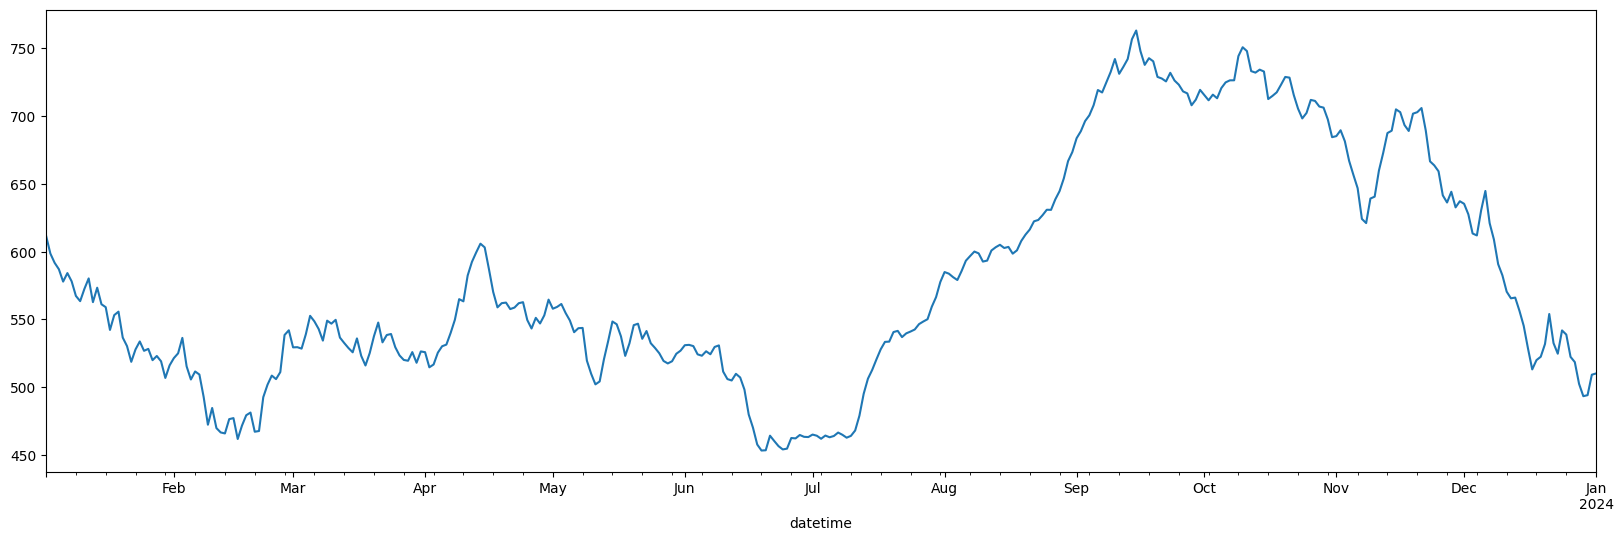

In [7]:
from src.historical_mean import group_data_by_day_of_year

historical_mean = group_data_by_day_of_year(train_rolling, idx)

test_rolling = test_rolling.copy()
test_rolling["doy"] = test_rolling.index.day_of_year

target_columns = [f"{target}_x", f"{target}_y"]
merged = (
    test_rolling.merge(historical_mean, on="doy")
    .loc[:, target_columns]
    .rename(columns=dict(zip(target_columns, ["test_data", "historical_data"])))
)

from sklearn.metrics import mean_absolute_percentage_error as mape

error = mape(merged["test_data"], merged["historical_data"])

error_message = f"error = {error:.4f}%"
merged.plot(figsize=FIGSIZE).text(
    merged.index.min(), merged.test_data.min(), error_message
)
plt.show()
test_rolling[target].plot(figsize=FIGSIZE)
error_message

In [8]:
by_day_rolling.to_csv(f"treated-data/by_day_rolling_{location}.csv")

In [9]:
from src.forecasting.forecast_picker import ForecastPicker

fp = ForecastPicker(
    by_day_rolling, date_threshold, date_upper_threshold, target, idx, mape
)

fp._forecast_scores

/home/fellipessanha/solar-studies/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


[0]	validation_0-rmse:918.30474	validation_1-rmse:524.37936
[99]	validation_0-rmse:127.43884	validation_1-rmse:70.92825


11:05:41 - cmdstanpy - INFO - Chain [1] start processing
11:05:42 - cmdstanpy - INFO - Chain [1] done processing


{<src.forecasting.xgb.XGBForecaster at 0x7f59e9c95330>: 0.10297617427243638,
 <src.forecasting.prophet.ProphetForecaster at 0x7f59e9c95360>: 0.1430147287914596}

0.10297617427243638


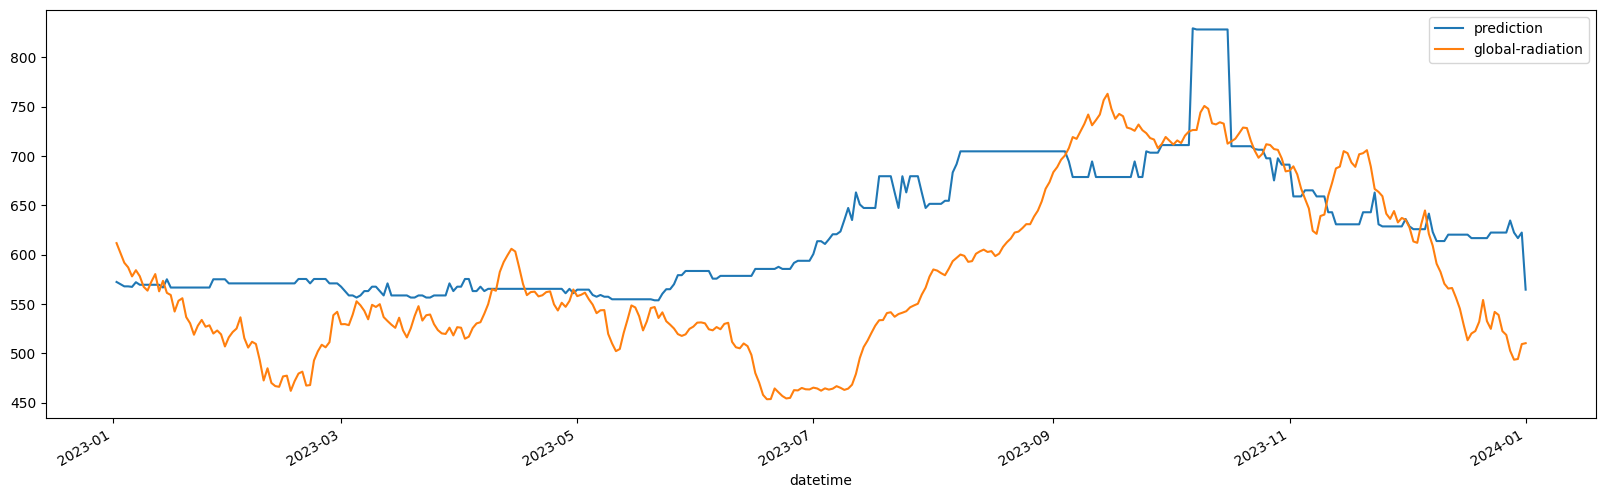

0.1430147287914596


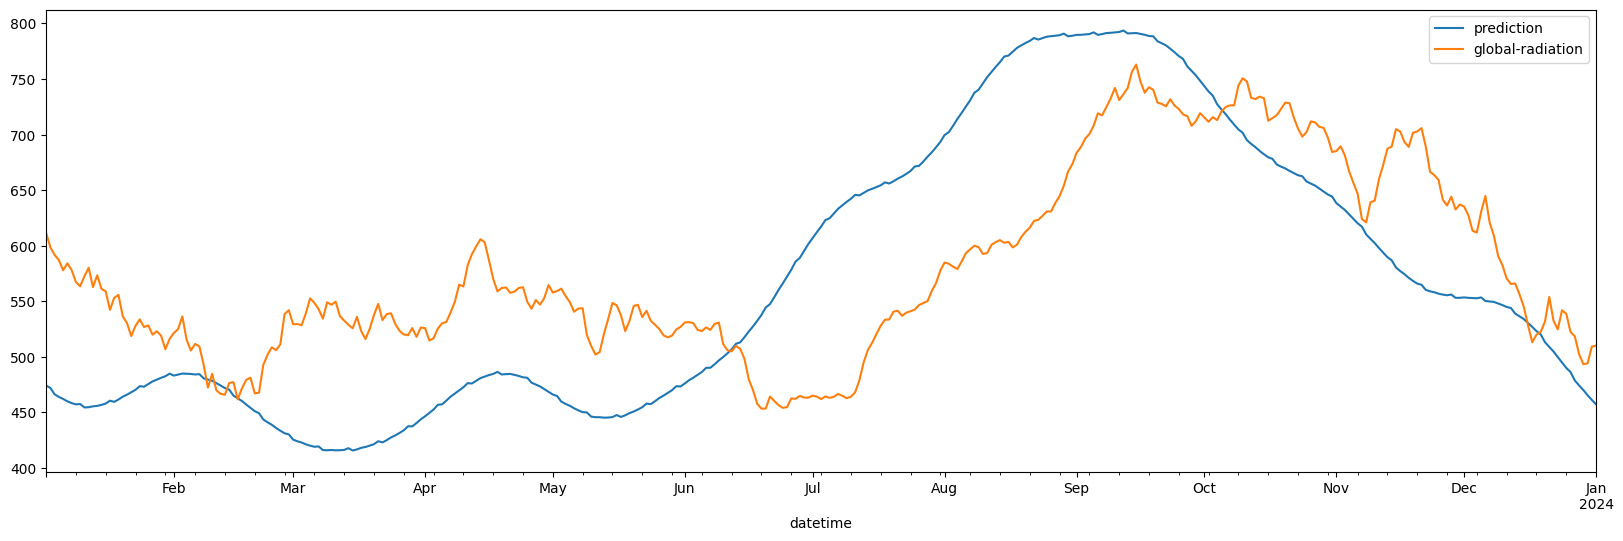

In [10]:
for p in fp._forecast_scores.keys():
    print(fp._forecast_scores[p])
    date = p.prediction.index.max()
    p.prediction.plot(figsize=FIGSIZE)
    plt.show()

In [11]:
pred = fp._make_prediction()

[0]	validation_0-rmse:1068.99705	validation_1-rmse:1068.99705
[99]	validation_0-rmse:125.09508	validation_1-rmse:125.09508


<Axes: >

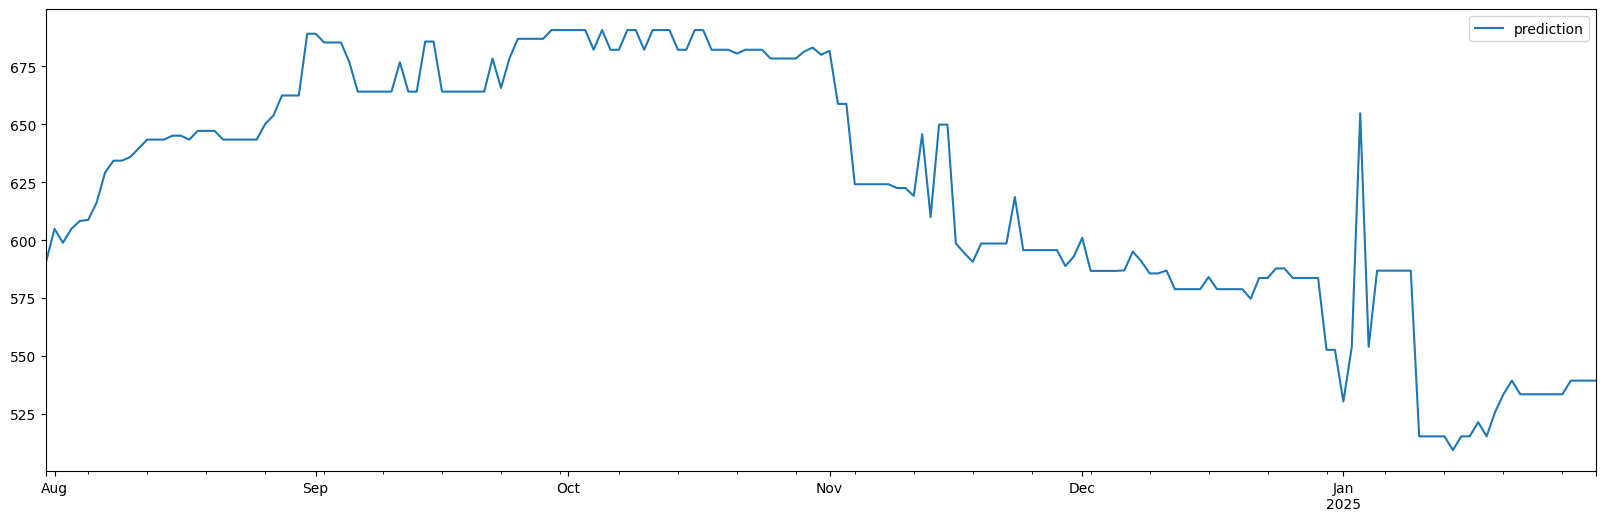

In [14]:
pred.plot(figsize=FIGSIZE)